# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

1. The data contained one mouse that was duplicated.  Since we do not know which record is correct we dropped the mouse from the data and results are without g989
2. Based on the summary statistics it appears that Capomulin was effective compared to the other treatements as it had the second lowest mean tumor volume and standard deviation besides the drug Ramicane
3. The two drugs with the most data points measured were the most effective and had the lowest standard deviation.  More data may be needed on the others to get a more accurate measure
4. The distribution in the trials seemed were close to evenly distributed by Sex 
5. The data of "Capomulin", "Ramicane", "Infubinol", "Ceftamin" appears to be pretty reliable with only one potential outlier
6. Based of mouse l509 it appears that Capomulin begins reducing tumor growth after 10 days of treatment.  This is only one data point and others should be included to get a more accurate gauge 
7. There is strong corrrelation between mouse weight and average tumor size.  This has the potential to skew results and it should be made sure that the mouse weight is consistent accross treatments if using tumor size as a measure of efficacy


In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_combined = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_combined.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
# Checking the number of mice.
mouse_combined["Mouse ID"].nunique()

249

In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_combined[mouse_combined.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mouse_id = duplicate_mouse["Mouse ID"].drop_duplicates()
print(duplicate_mouse.head(100))
print(duplicate_mouse_id)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
861     g989          0           45.000000                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
867     g989         15           53.442020                 0     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
861  Female          21          26  
863  Female          21          26  
865  Female          21          26  
867  Female          21          26  
869  Female          21          26  
861    g989
Name: Mouse ID, dtype: object


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_combined.loc[mouse_combined["Mouse ID"]!="g989",:]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [31]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen = cleaned_df.groupby(cleaned_df["Drug Regimen"])
drug_mean = drug_regimen["Tumor Volume (mm3)"].mean()
drug_median = drug_regimen["Tumor Volume (mm3)"].median()
drug_variance = drug_regimen["Tumor Volume (mm3)"].var()
drug_deviation = drug_regimen["Tumor Volume (mm3)"].std()
drug_error = drug_regimen["Tumor Volume (mm3)"].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_df = pd.DataFrame({
    "Mean Tumor Volume": drug_mean,
    "Median Tumor Volume": drug_median,
    "Tumor Volume Variance": drug_variance,
    "Tumor Volume Std. Dev.": drug_deviation,
    "Tumor Volume Std. Err." : drug_error
})


drug_df.head()


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_df=cleaned_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
drug_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Data Points'>

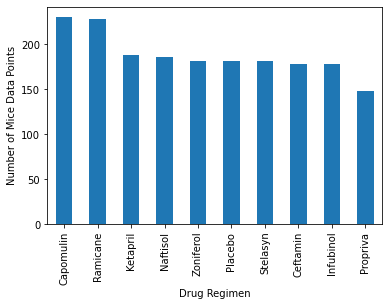

In [112]:
# Generate a bar plot showing the total number of unique mice data points tested on each drug regimen using pandas.
drug_df_mice = drug_regimen["Mouse ID"].count().sort_values(ascending = False)

drug_df_mice.plot(kind="bar",ylabel = "Number of Mice Data Points")


Text(0, 0.5, 'Number of Mice Data Points')

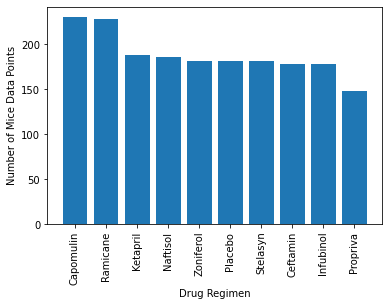

In [126]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
plt.bar(drug_df_mice.index,drug_df_mice.values)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Data Points")

<AxesSubplot:ylabel='Sex'>

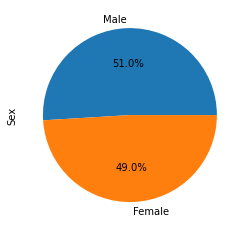

In [148]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = cleaned_df.groupby("Sex").count().sort_values(by = "Sex", ascending = False)
mouse_sex = mouse_sex["Mouse ID"]

mouse_sex.plot(kind="pie", ylabel="Sex", autopct='%1.1f%%')



Text(0, 0.5, 'Sex')

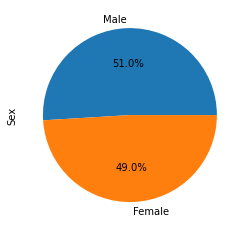

In [155]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex
plt.pie(mouse_sex.values, labels=mouse_sex.index, autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [189]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_df = cleaned_df.groupby("Mouse ID")
max_timepoint = grouped_df["Timepoint"].max()
max_timepoint = max_timepoint.to_frame(name="max")
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_cleaned_df = cleaned_df.join(max_timepoint, on='Mouse ID')
max_df = new_cleaned_df.loc[new_cleaned_df["Timepoint"]==new_cleaned_df["max"],:]
max_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max
9,b128,45,38.982878,2,Capomulin,Female,9,22,45
10,f932,0,45.000000,0,Ketapril,Male,15,29,0
18,g107,35,71.905117,0,Ketapril,Female,2,29,35
21,a457,10,49.783419,0,Ketapril,Female,11,30,10
30,c819,40,62.175705,1,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1857,t565,45,34.455298,0,Capomulin,Female,20,17,45
1867,i557,45,47.685963,1,Capomulin,Female,1,24,45
1877,m957,45,33.329098,1,Capomulin,Female,3,19,45
1882,f966,20,30.485985,0,Capomulin,Male,16,17,20


In [243]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    max_drug=max_df.loc[max_df["Drug Regimen"]==drug,:]
    # add subset 
    max_drug=max_drug[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
    tumor_vol_list.append(max_drug["Tumor Volume (mm3)"])


    # Determine outliers using upper and lower bounds
    quartiles = max_drug["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = (lowerq - (1.5*iqr))
    upper_bound = (upperq + (1.5*iqr))


    # for Mouse in max_drug["Mouse ID"]:
    outlier=max_drug.loc[(max_drug["Tumor Volume (mm3)"] <=lower_bound) | (max_drug["Tumor Volume (mm3)"] >= upper_bound),:]
    upper_outlier=max_drug.loc[max_drug["Tumor Volume (mm3)"] >= upper_bound,:]
    print(f"This may be a potential outlier:{outlier}")





This may be a potential outlier:Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Tumor Volume (mm3)]
Index: []
This may be a potential outlier:Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Tumor Volume (mm3)]
Index: []
This may be a potential outlier:    Mouse ID Drug Regimen  Tumor Volume (mm3)
214     c326    Infubinol           36.321346
This may be a potential outlier:Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Tumor Volume (mm3)]
Index: []


Text(0, 0.5, 'Final Tumor Volume (mm3)')

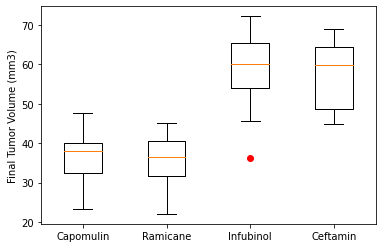

In [255]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_list, 0, "Red")

x = np.arange(len(treatment_list))
ax1.set(xticks=x+1, xticklabels=treatment_list)
ax1.set_ylabel("Final Tumor Volume (mm3)")


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

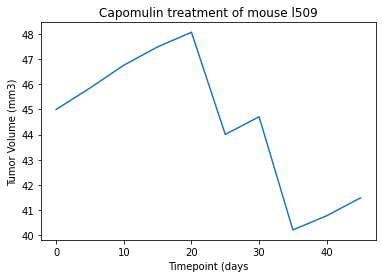

In [272]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Did a lookup for Capomulin and picked a mouse
capomulin_df=cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin",:]

mouse_l509=capomulin_df.loc[capomulin_df["Mouse ID"]=="l509",:]
mouse_l509

plt.plot(mouse_l509["Timepoint"], mouse_l509["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")



Text(0, 0.5, 'Average Tumor Volume (mm3)')

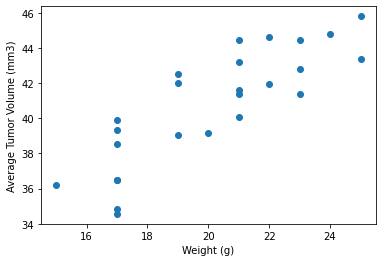

In [279]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
y_axis = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
x_axis = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(x_axis, y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

The correlation coefficient between Average Tumor Volume and Weight is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

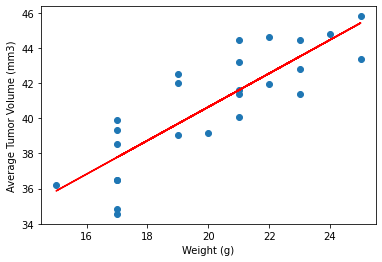

In [287]:
# Calculate the correlation coefficient and linear regression model 
correlation_co = st.pearsonr(y_axis,x_axis)[0]
print(f"The correlation coefficient between Average Tumor Volume and Weight is {round(correlation_co,2)}")

slope,intercept,r,p,err = st.linregress(x_axis,y_axis)
line_best = slope * x_axis + intercept


# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,line_best, "red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
